# Entropy

## Information and surprise

Information of one event:

$$\mathrm {I}(E)=\log{\frac{1}{p(E)}}=-\log{p}(E)$$

The inverse captures the idea of information as surprise: if something has a low probability of happening, it has a high element of surprise and thus contains much more information than something that happens with high probability, which is something that we can guess. Taking the log makes information additive wich is obviously a desirable property.

## Entropy

$${\displaystyle \mathrm {H} (X)=-\sum _{i=1}^{n}{\mathrm {p} (x_{i})\log \mathrm {p} (x_{i})}}$$

So the entropy of a random variable X is the average of the information over all realizations of X and the entropy can also be expressed as the expectation of the information:

$${\displaystyle \mathrm {H} (X)=\mathrm {E} [\mathrm {I} (X)]=\mathrm {E} [-\log(\mathrm {p} (X))]}$$

## Conditional Entropy

$${\displaystyle \mathrm {H} (Y|X)\ =-\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {p(y|x)}=-\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {\frac {p(x,y)}{p(x)}}}$$

The intuition behind this formula is that the information of X i.e. log p(x) is subtracted to the log joint propabilities i.e. the joint information. This intuition is confirmed by the fact that:

$${\displaystyle \mathrm {H} (Y|X) = \mathrm {H} (X,Y)-\mathrm {H} (X)}$$

Notes:
- if X and Y and independent, knowing X does not help us to know anything about Y and hence:

$${\displaystyle \mathrm {H} (Y|X) = \mathrm {H} (Y)}$$

- because H(Y|X) is the amount of information that is contained in Y that is additional to the information already contained in X, it make sense that:

$${\displaystyle \mathrm {H} (Y|X) \leq \mathrm {H} (Y)}$$

# Mutual information

## Definitions and properties

$${\displaystyle \mathrm {I} (X,Y)=\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}{p_{(X,Y)}(x,y)\log {\left({\frac {p_{(X,Y)}(x,y)}{p_{X}(x)\,p_{Y}(y)}}\right)}}}$$

Notes:
- if X and Y are independent the ratio of the joint probability divided by the product of the marginal probabilities is 1, and hence the mutual is information is 0
- from the above formula one can see that I(X, Y) when X=Y is H(X); indeed the joint probability of p(X,Y) where X==Y is 0 whenever X!=Y and equal to X when X==Y, thus the above mutual information becomes:
$${\displaystyle \mathrm {I} (X,Y eq X)=\sum _{x\in {\mathcal {X}}}{p_{X}(x)\log {\left({\frac {p_{X}(x)}{p_{X}(x)\,p_{X}(x)}}\right)}}=-\sum _{x\in {\mathcal {X}}}{p_{X}(x)\log {p_{X}(x)}}=H(X)}$$
- I(X, Y) is always >= 0
- if we subtract the conditional entropy H(Y|X) to the entropy of Y, that is we subtract the information in Y that is due to X, we obtain the mutual information:

$${\displaystyle \mathrm {I} (X,Y)=\mathrm {H} (Y) - \mathrm {H} (Y|X)}$$

- the mutual information can also be expressed as the divergence between the joint distribution and the product of the marginal distributions:

$${\displaystyle \mathrm {I} (X,Y)=D_{\text{KL}}\left(p_{(X,Y)}\parallel p_{X}p_{Y}\right)}$$

- the mutual information can also be expressed as an expectation:

$${\displaystyle \mathrm {I} (X,Y)=\mathbb {E} _{Y}\left[D_{\text{KL}}\!\left(p_{X\mid Y}\parallel p_{X}\right)\right]=\mathbb {E} _{X}\left[D_{\text{KL}}\!\left(p_{Y\mid X}\parallel p_{Y}\right)\right]}$$

## Relationship to entropy
From [Wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

<img src="Entropy-mutual-information-relative-entropy-relation-diagram.svg" width="400">

## Implementation (discrete case)

In [1]:
library(data.table)
library(ggplot2)
library(mpmi)   # for dmi (discrete mutual information calculation)
library(MASS)   # for mvrnorm (multivariate normal random numbers)

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



In [2]:
calc_mi <- function(mat) {  ## X in rows, Y in cols
    marg_x <- rowSums(mat)
    marg_y <- colSums(mat)
    px_py <- marg_x %*% t(marg_y)
    sum(mat*log2(mat/px_py))
}

## Example

### Joint Bernouilli
Consider a joint bernouilli distribution:
<style>
table, th, td {
  border: 1px solid black;
  border-collapse: collapse;
}
</style>
<table>
  <tr style="border-bottom: 1px solid;background-color:#FFFFFF">
    <td></td>
    <td></td>
    <td style="border-left: 1px solid;"><b>0</b></td>
    <td><b>1</b></td>
    <td style="border-left: 1px solid;"><b>X marginal</b></td>
  </tr>
  <tr>
    <td></td>
    <td><b>0</b></td>
    <td style="border-left: 1px solid;">p<sub>00</sub></td>
    <td>p<sub>01</sub></td>
    <td style="border-left: 1px solid;">p<sub>00</sub> + p<sub>01</sub></td>
  </tr>
  <tr style="background-color:#FFFFFF;">
    <td></td>
    <td><b>1</b></td>
    <td style="border-left: 1px solid;">p<sub>10</sub></td>
    <td>p<sub>11</sub></td>
    <td style="border-left: 1px solid;">p<sub>10</sub> + p<sub>11</sub></td>
  </tr>
  <tr style="border-top: 1px solid;">
    <td></td>
    <td><b>Y marginal</b></td>
    <td style="border-left: 1px solid;">p<sub>00</sub> + p<sub>10</sub></td>
    <td>p<sub>01</sub> + p<sub>11</sub></td>
    <td style="border-left: 1px solid;"></td>
  </tr>
</table>

Now consider a symmetrical joint bernouilli distribution with equal elements in the diagonal (i.e. p<sub>00</sub> equal p<sub>11</sub>) and equal elements in the non-diagonal (i.e. p<sub>10</sub> equals p<sub>01</sub>). This type of distribution is entirely determined by one probability, for instance p<sub>00</sub>. We make use of such distributions so that we can vary the dependence between X and Y by increasing or decreasing the probability differences between the diagonals and non-diagonals.

In [3]:
make_joint_bernouilli_symmetric_distribution <- function(x) {
    p = c(x, 1-x)
    cbind(p, rev(p))/2
}

Define the functions to calculate the correlation of a joint bernouilli distribution:

In [4]:
get_variance_X <- function(mat) {
    p00 <- mat[1,1]; p10 <- mat[2,1]; p01 <- mat[1,2]; p11 <- mat[2,2]
    (p00 + p01)*(p10 + p11)
}

get_variance_Y <- function(mat) {
    p00 <- mat[1,1]; p10 <- mat[2,1]; p01 <- mat[1,2]; p11 <- mat[2,2]
    (p00 + p10)*(p01 + p11)
}

get_covariance <- function(mat) det(mat)  ## see notes for a proof

get_correlation <- function(mat) get_covariance(mat) / sqrt(get_variance_X(mat)) / sqrt(get_variance_Y(mat))

Now vary the dependence between X and Y by varying p<sub>00</sub> over the interval \[0, 1\]:

$$
\begin{bmatrix}0 & 0.5\\0.5 & 0\end{bmatrix}
\begin{bmatrix}0.01 & 0.49\\0.49 & 0.01\end{bmatrix}
\cdots
\begin{bmatrix}0.25 & 0.25\\0.25 & 0.25\end{bmatrix}
\cdots
\begin{bmatrix}0.5 & 0\\0 & 0.5\end{bmatrix}
$$

In [5]:
by=0.001
start <- by
end   <- 1-by
x <- seq(start, end, by=by)

mi_vec  <- sapply(x, function(x) calc_mi(make_joint_bernouilli_symmetric_distribution(x)))
cor_vec <- sapply(x, function(x) get_correlation(make_joint_bernouilli_symmetric_distribution(x)))
                 
dt <- rbind(data.table(x=x, y=mi_vec, stat="mutual information"),
            data.table(x=x, y=cor_vec, stat="correlation"))

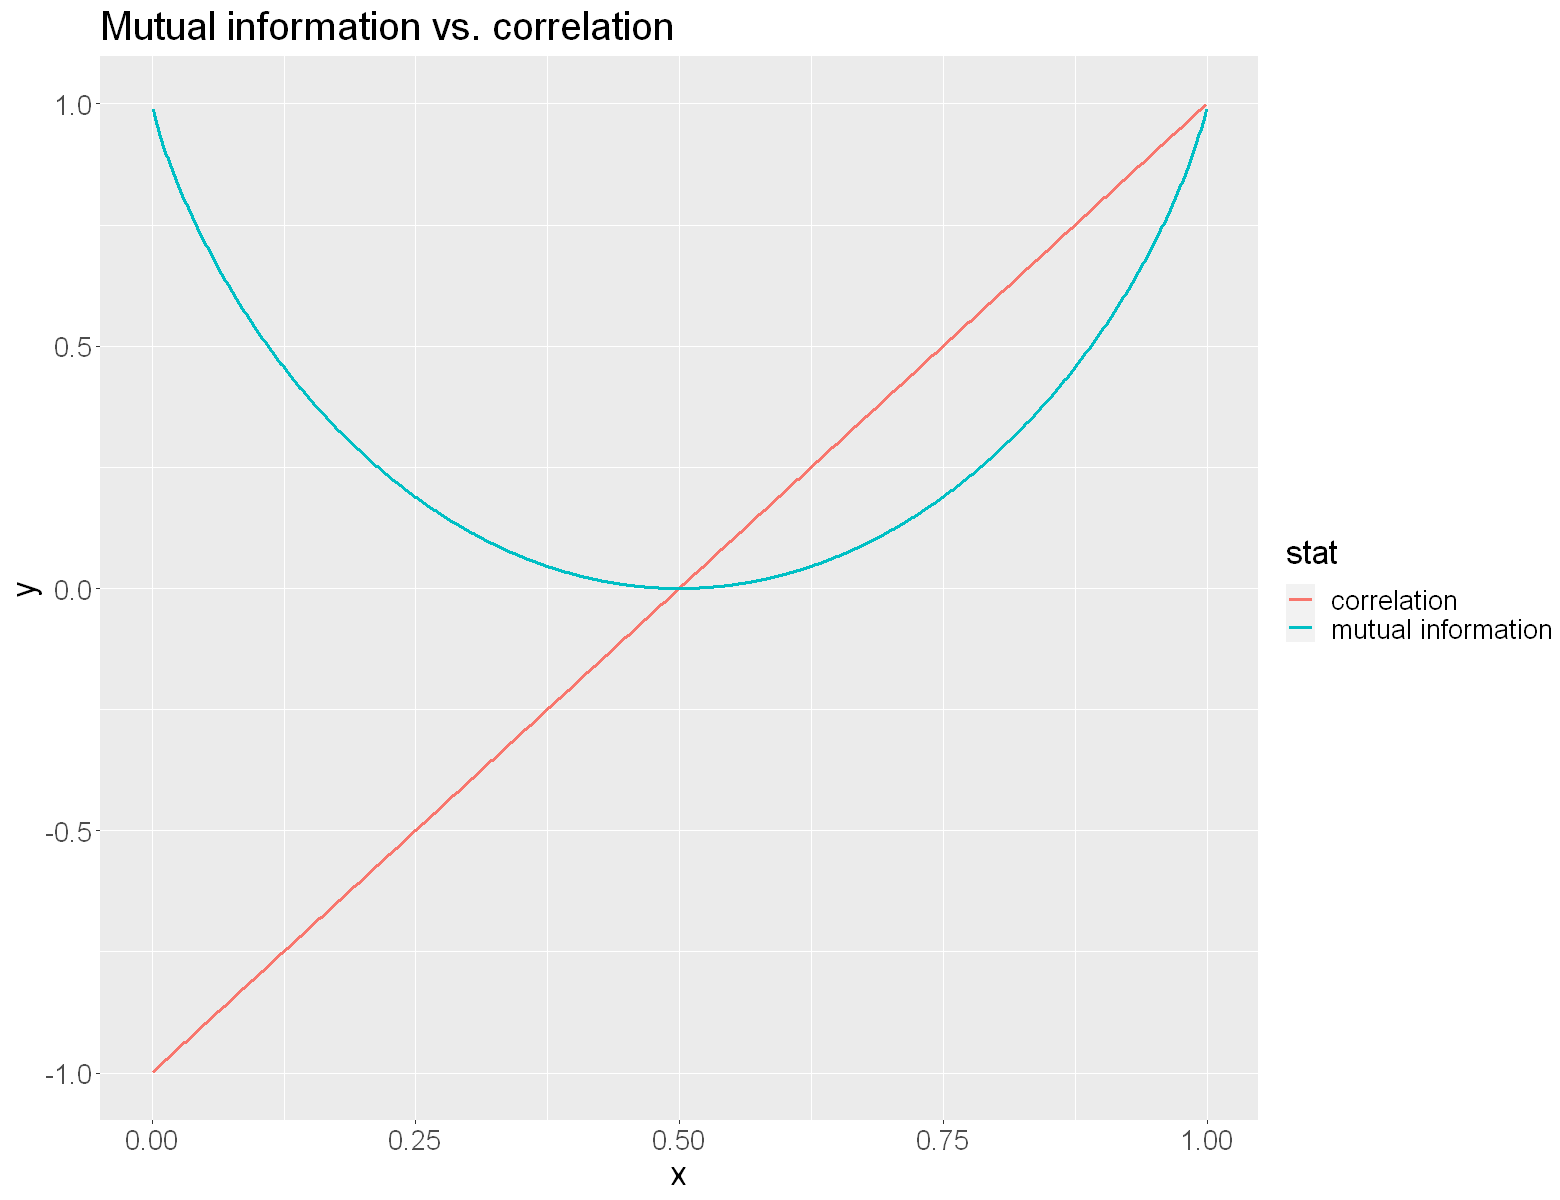

In [6]:
options(repr.plot.width=13, repr.plot.height=10)
ggplot(dt, aes(x, y)) + geom_line(aes(group=stat, colour=stat), size=1) + 
    theme(text = element_text(size=20)) +
    ggtitle("Mutual information vs. correlation")

Note that the limit of the mutual information on both sides is H(X), which for a Bernouilli distribution with p=0.5 is 1:
$${\displaystyle \mathrm {H} (X)=-\sum _{i=1}^{n}{\mathrm {p} (x_{i})\log \mathrm {p} (x_{i})}}=-2 \cdot 0.5 \cdot \mathrm{log_{2}}(0.5) = 1$$

### Continuous distributions

#### Naive example
Here we generate a uniform for X and then for Y a linear combination of X with a varying beta to which we add another uniform. This will not generate a linear correlation because of the dimensions of the distributions we combine, but it is interesting nonetheless to look at it.

In [7]:
## calculate a normalizes mi
nmi <- function(xy) {
    mi <- cmi(xy)$bcmi
    2*mi[1,2]/sum(diag(mi))  ## normalized mi
}

## make a data table in a format we can easily use with 'ggplot'
calc_nmi_cor <- function(beta, gen_func) {
    xy <- gen_func(beta)
    rbind(data.table(stat="cor", beta=beta, val=cor(xy)[1,2]),
          data.table(stat="nmi", beta=beta, val=nmi(xy)))
}

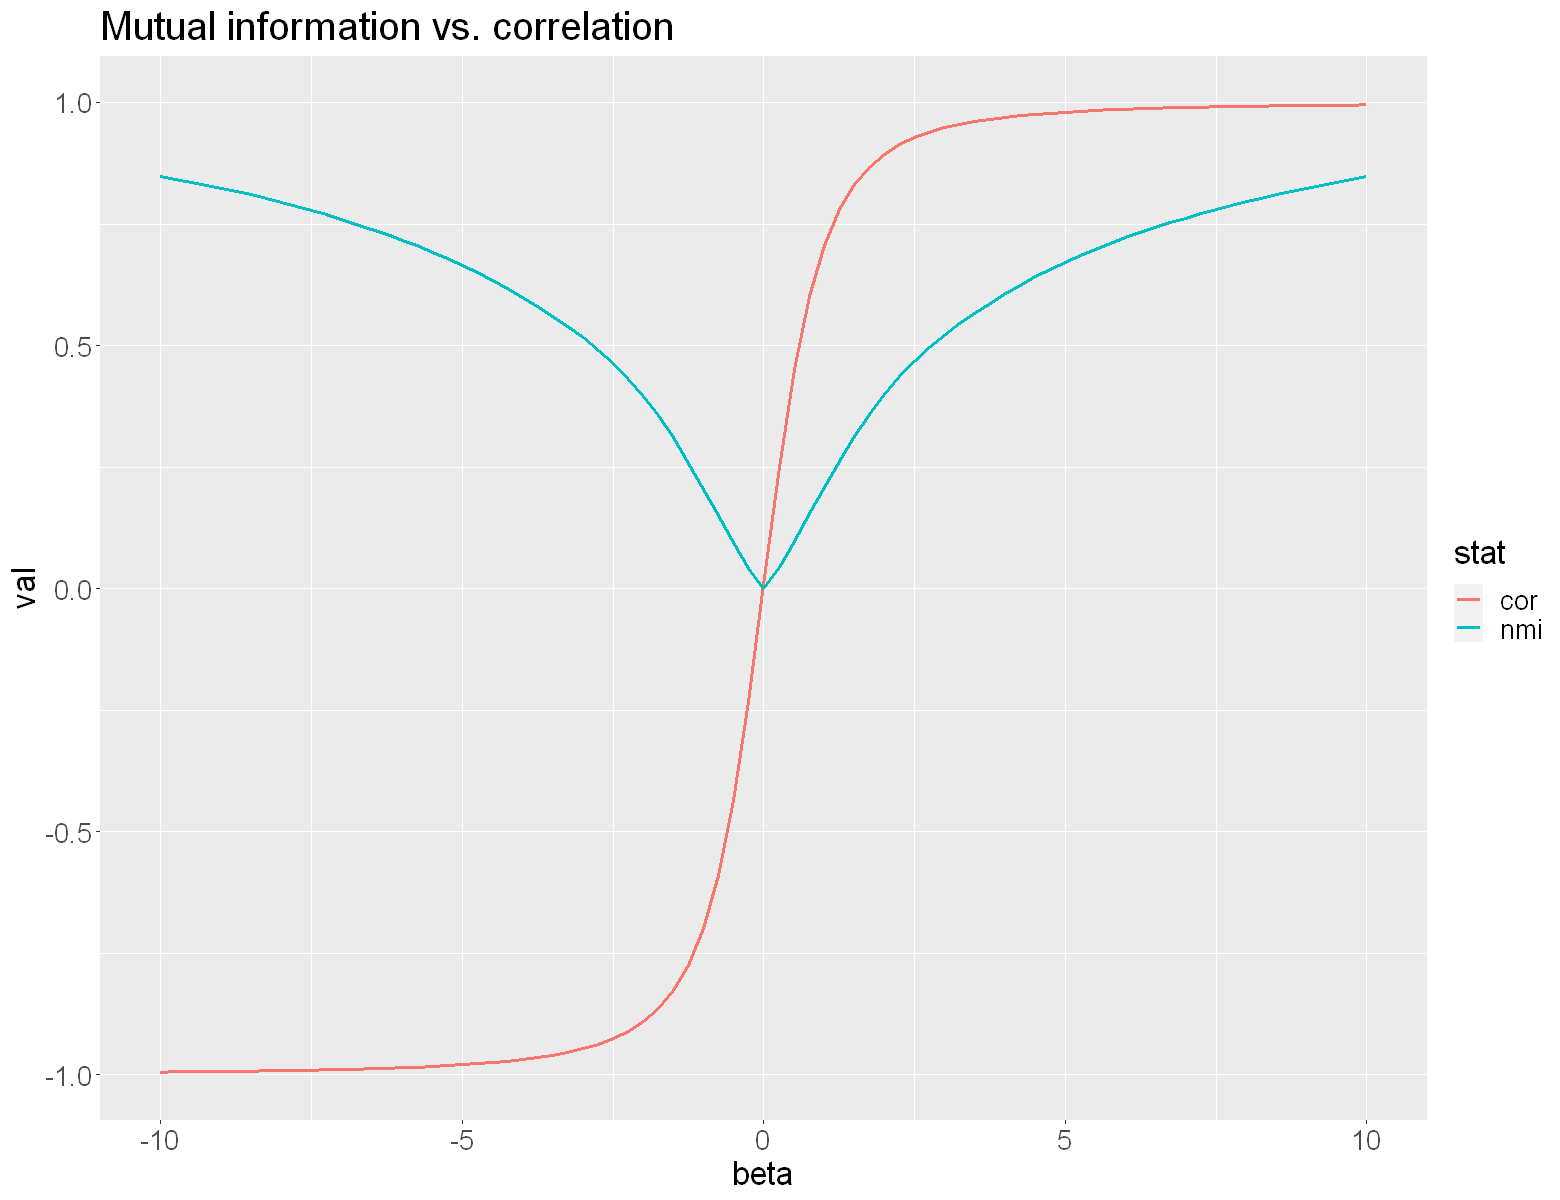

In [8]:
N <- 5000
a <- runif(N, 0, 1)
b <- runif(N, 0, 1)

generate_mix_samples <- function(factor) {
    cbind(a, factor*a + b)
}

f <- seq(-10, 10, by=0.25)

res <- lapply(f, function(x) calc_nmi_cor(x, generate_mix_samples))
dt <- do.call(rbind, res)

ggplot(dt, aes(beta, val)) + geom_line(aes(group=stat, colour=stat), size=1) +
    theme(text = element_text(size=20)) +
    ggtitle("Mutual information vs. correlation")

#### Bivariate normal
With the bivariate normal we can specify precisely the correlation we want with the covariance matrix.

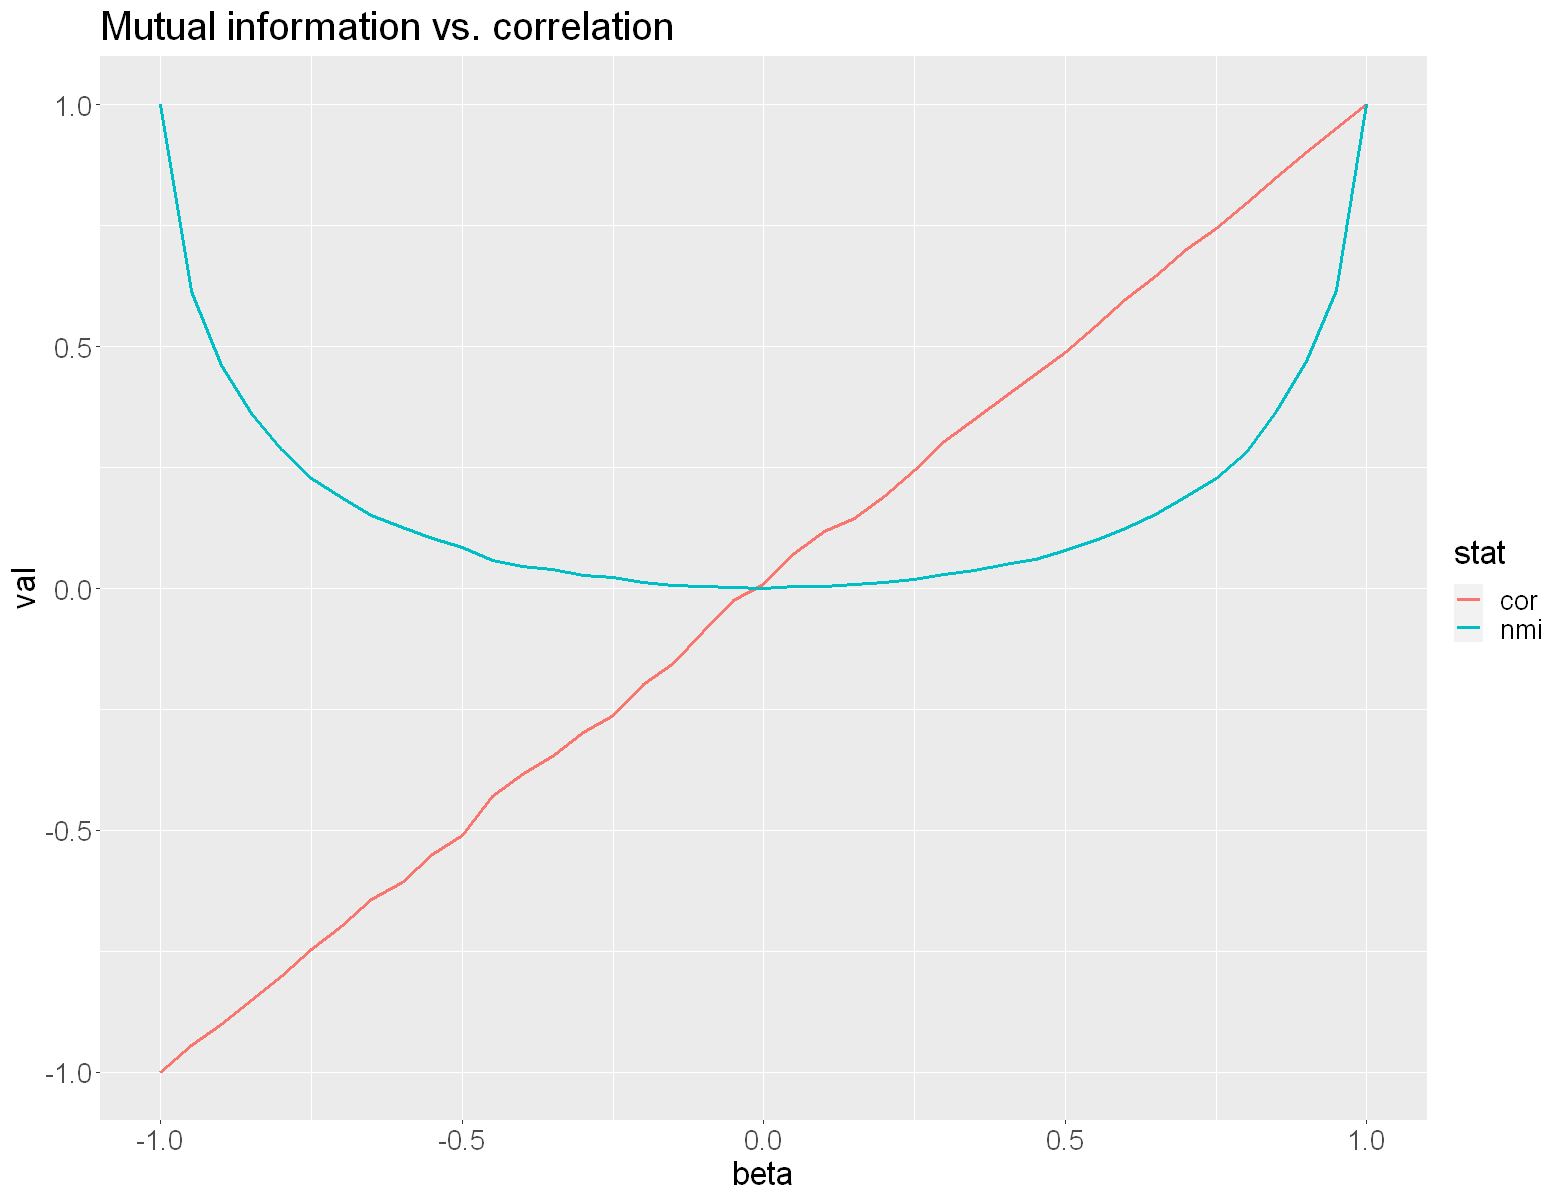

In [9]:
## generate a bivariate normal with sigma(x,x)=1 and sigma(x,y)=beta:
generate_mvrnorm <- function(beta) {
    mu    <- c(0,0)
    sigma <- matrix(c(1, beta, beta, 1), 2, 2)
    mvrnorm(N, mu, sigma)
}

f <- seq(-1, 1, by=0.05)

res <- lapply(f, function(x) calc_nmi_cor(x, generate_mvrnorm))
dt <- do.call(rbind, res)

ggplot(dt, aes(beta, val)) + geom_line(aes(group=stat, colour=stat), size=1) +
    theme(text = element_text(size=20)) +
    ggtitle("Mutual information vs. correlation")

## Intuition

It's useful to have in mind the definition of independence when thinking about the mutual information, which is that X and Y are independent if and only if the following holds:


$${\displaystyle \mathrm {P} (X, Y)=\mathrm {P} (X)\mathrm {P} (Y)}$$

### ratio
One element to make sense of the mutual information is the ratio of the join probabilities and the product of the marginal probabilities:

$${{\frac {p_{(X,Y)}(x,y)}{p_{X}(x)\,p_{Y}(y)}}}$$

When the two variables are independent, the numerator and denominator are equal, so the log gives back 0. It can also be shown that the mutual information can only be 0 if each term in the sum is 0, i.e. if every p(x<sub>i</sub>y<sub>j</sub>) is equal to p(x<sub>i</sub>)p(y<sub>i</sub>).

### log likelihood ratio test

It is possible to relate the mutual information to the log likelihood ratio test or G-test of a contingency table:

$${\displaystyle {\begin{alignedat}{2}G&=&\sum _{i=1}^{m}\sum _{j=1}^{n}O_{ij}\ln \left({\frac {O_{ij}}{E_{ij}}}\right)\end{alignedat}}}$$

And (close to as poached from [Wikipedia](https://en.wikipedia.org/wiki/G-test)): 

$${\displaystyle N=\sum _{ij}{O_{ij}}\;,}\; {\displaystyle \;p_{(X,Y)}(x,y)={\frac {O_{ij}}{N}}\;,}\; {\displaystyle \;{p_{X}(x)}={\frac {\sum _{j}O_{ij}}{N}}\;,}\;{p_{Y}(y)}={\frac  {\sum _{i}O_{{ij}}}{N}}\; \;$$

Then G can be expressed with the mutual information:

$${\displaystyle \begin{alignedat}{3}
G&=& 2 N \sum _{ij}{\log p_{(X,Y)}(x,y)\left(\log p_{(X,Y)}(x,y)-\log {p_{X}(x)} - \log {p_{Y}(y)} \right)}
\\&=&2 N \left[-\mathrm H(X,Y) + \mathrm H(X) + \mathrm H(Y)\right]
\\&=&2 N \mathrm I (X,Y)
\end{alignedat}}$$

## Estimation

The estimation of the mutual information is not straighforward, neither in the discrete case nor in the continuous case (and there is the additional distinction of parametric and non-parametric). Fortunately, there has been a lot of research to find performant estimators, so from a practical point of view this is rarely an issue.

### Discrete case

To show one of the challenges in the mutual information estimate, we compare the theoretical value with a naive approach using uncorrected frequencies and a de-biased version implementation from package the `mpmi`:

In [10]:
## generate `n` random values for a bivariate bernouilli with probability matrix `p`
rbivariatebern <- function(n, p) {
    px_marginal       <- rowSums(p)/sum(rowSums(p))
    py_conditional_x0 <- p[1, ] / px_marginal[1]
    py_conditional_x1 <- p[2, ] / px_marginal[2]

    x <- rbinom(n, 1, px_marginal[2])
    y <- rep(0, n)                      # blank y
    n_x <- sum(x)
    y[x == 0] <- rbinom(n-n_x, 1, py_conditional_x0[2])
    y[x == 1] <- rbinom(n_x,   1, py_conditional_x1[2])
    cbind(x, y)
}


## calculate the theoretical mi and a naive and corrected estimate:
calculate_all_mi <- function(p, n) {
    xy <- rbivariatebern(n, p)
    ## build the estimated probability matrix using the various frequencies:
    p_hat <- matrix(c(sum(xy[,1]==0 & xy[,2]==0),
                      sum(xy[,1]==1 & xy[,2]==0),
                      sum(xy[,1]==0 & xy[,2]==1),
                      sum(xy[,1]==1 & xy[,2]==1))/dim(xy)[1], 2, 2)
    c(calc_mi(p_hat), dmi(xy)$bcmi[1,2]/log(2)) # divide by log(2) because the 'dmi' function uses natural log
}

## for different sample sizes, calculate the mi with the three methods above:
average_mi <- function(p, n, N) {
    ## take the means over N simuations:
    means <- colMeans(t(sapply(1:N, function(x) calculate_all_mi(p, n))))
    data.table(n=n, theoretical=calc_mi(p),naive=means[1], corrected=means[2])
}

In [11]:
## generate:
p <- matrix(c(0.35, 0.18, 0.25, 0.22), 2, 2)  ## abandon the symmetric probability matrices for a more general one
mi_vec <- lapply(seq(50, 1000, by=50), function(n) average_mi(p, n, N=10000))

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."


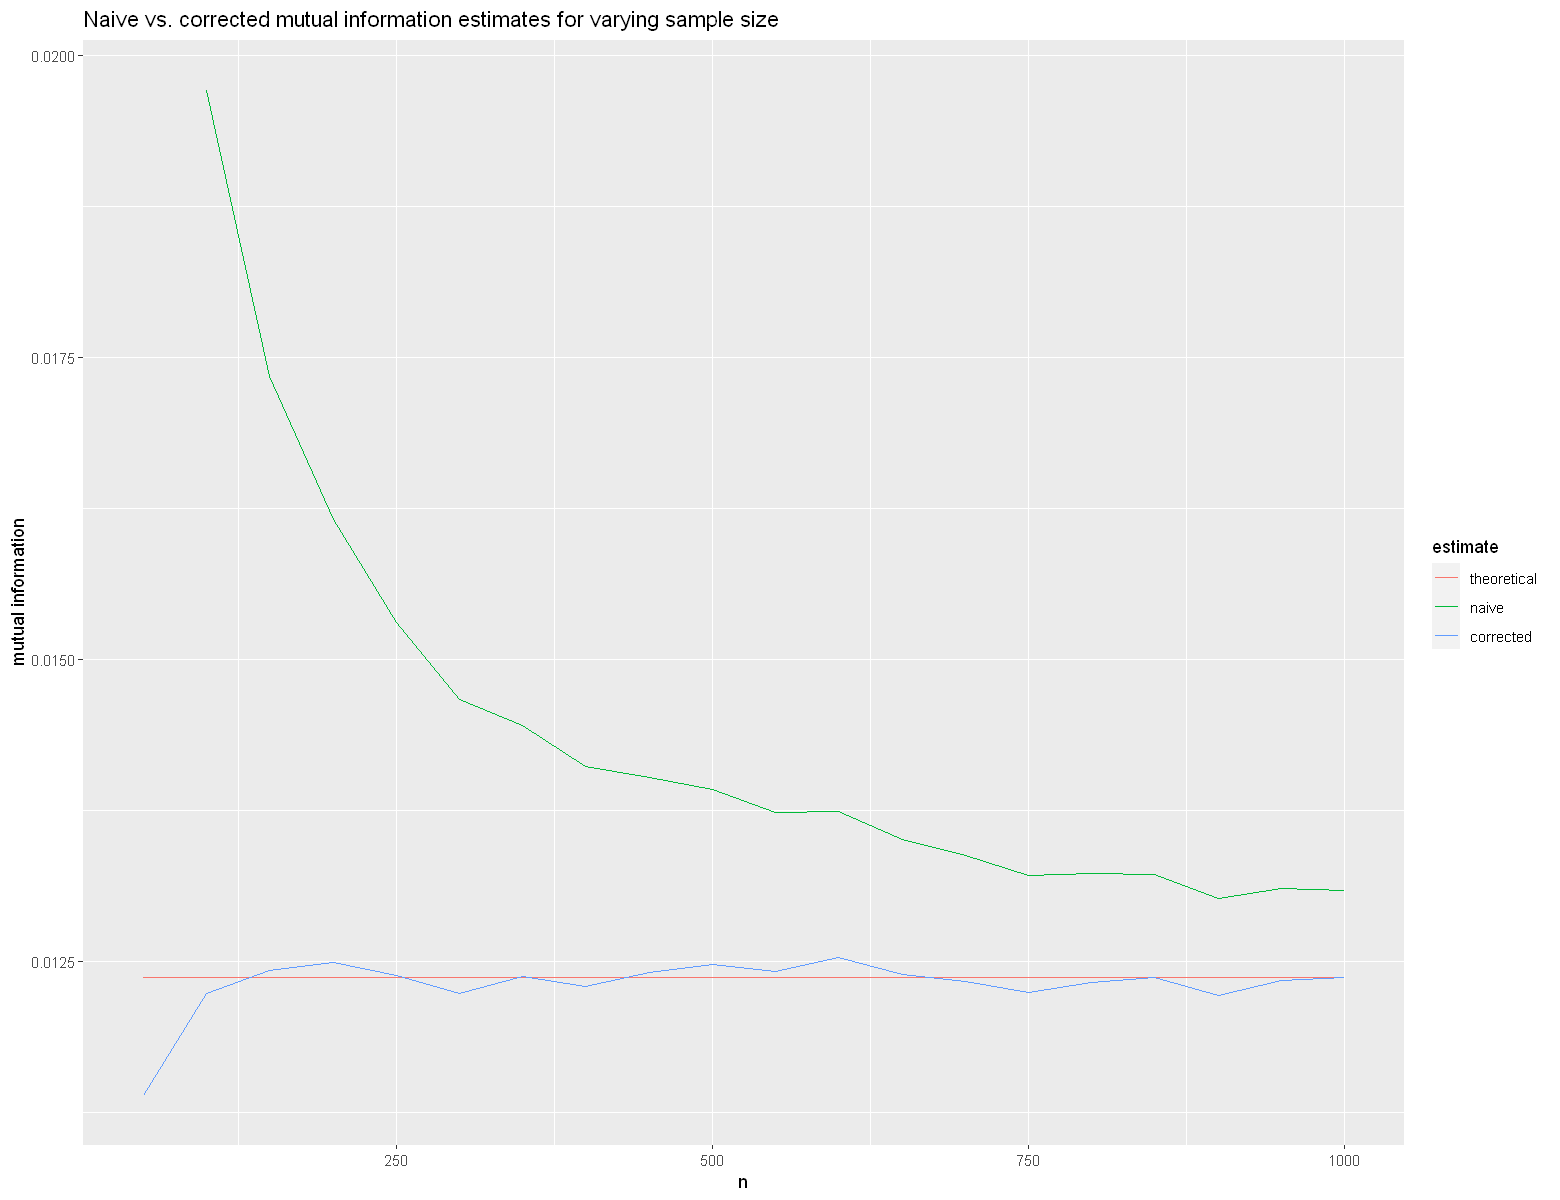

In [12]:
## plot:
mi_vec_dt <- do.call(rbind, mi_vec)
mi_vec_melt <- melt(mi_vec_dt, id.vars="n", variable.name="estimate", value.name="mutual information")
ggplot(mi_vec_melt, aes(x=n, y=`mutual information`)) + 
    geom_line(aes(group=estimate, color=estimate)) +
    ggtitle("Naive vs. corrected mutual information estimates for varying sample size")

###  Continuous case

The continuous non-parametric case is even more difficult than the discrete case. A number of techniques exist based on partitions or kNN density estimation. See for example [On the Estimation of Mutual Information](https://arxiv.org/abs/1910.00365) by Carrara & Ernst.

## Discussion

- mutual information allows to measure the association between two variables, both in the categorical case and in the continuous case

- mutual information estimation can be slow

- mutual information can be difficult to interpret, even when normalized

- finally, in the continuous case, to come back to some differences between mutual information and correlation:
    - correlation is a measure of linear association. This is highlited by the relationship between the slope of the regression line and the correlation:

    $$ \hat{\beta}=cor(Y,X) \frac{sd(Y)}{sd(X)} $$

    - correlation can be an imprecise metric on non-linear relationships
    - mutual information does not have the intuitive "direction" that correlation has (it is always a positive value)

## Notes/proofs

### The covariance is the determinant of the distribution matrix

$$\displaystyle \mathrm {Cov}(X,Y) = \mathrm{E}(XY) - \mathrm{E}(X)\mathrm{E}(Y) = $$

$$\displaystyle p_{11} - (p_{10}+p_{p11})(p_{01}+p_{11}) = p_{11}-\big[p_{10}p_{01}+p_{11}(p_{10}+p_{01}+p_{11})\big] = p_{11}-\big[p_{10}p_{01} + p_{11}(1-p_{00})\big]=p_{11}p_{00}-p_{10}p_{01}$$

### Positivity of mutual information

This is a shorter proof than commonly found online, the outline of which is suggested in Exercise 6.10 of Applebaum, 2008.

To prove positivity we need:

The definition of mutual information in terms of entropy:

$$\begin{equation} \mathrm {I} (X,Y)=\mathrm {H} (Y) - \mathrm {H} (Y|X)\end{equation} \label{eq:first} \tag{1}$$

The definition of marginal probability:

$$\begin{equation}
p(y) = \sum _{x\in {\mathcal {X}}} {p(x,y)} \label{eq:second} \tag{2}
\end{equation}$$

Gibbs' inequality:

$$\begin{equation} 
-\sum _{x\in {\mathcal {X}}} p(x)\log p(x) \leq - \sum _{x\in {\mathcal {X}}} p(x) \log q(x)
\end{equation} \label{eq:third} \tag{3}$$

Using (1), we only need to show that $$\mathrm {H} (Y|X) \leq {H} (Y) $$

For this we start out by the following rewrites of H(Y|X) and H(Y), by (2):

$$\begin{equation} \mathrm {H} (Y|X)\ =-\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {p(y|x)}=-\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {\frac {p(x,y)}{p(x)}}
\end{equation}
$$ 
$$ \begin{equation} \mathrm {H} (Y)\ =-\sum _{y\in {\mathcal {Y}}}p(y)\log {p(y)}=-\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {p(y)}
\end{equation}$$

Now we can show that:

$$ \begin{equation}
-\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {\frac {p(x,y)}{p(x)}} \leq -\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {p(y)}
\end{equation}$$

By rewriting:
$$ \begin{equation}
-\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {{p(x,y)}} \leq -\sum _{y\in {\mathcal {Y}}}\sum _{x\in {\mathcal {X}}}p(x,y)\log {p(y)p(x)}
\end{equation}$$

And now we can easily see that by (3) the inequality holds.

## Bibliography
- James V. Stone. 2013. Information Theory: A Tutorial Introduction. Sebtel Press, USA.
- David Applebaum. 2008. Probability and Information: An Integrated Approach (2nd. ed.). Cambridge University Press, USA.
- [Ethan Weinberger. The Joint and Conditional Entropies (blog entry)](https://homes.cs.washington.edu/~ewein//blog/2020/07/30/joint-entropy/)
- [Scott Roy. The relationship between correlation, mutual information, and p-values (blog entry)](https://scottroy.github.io/the-relationship-between-correlation-mutual-information-and-p-values.html)
